In [1]:
from ExpModule import *
exp_result = []
exp_pred = []
models = []

In [2]:
train.shape, valid.shape

((1020, 14), (438, 14))

In [2]:
train.shape, valid.shape

((729, 14), (729, 14))

In [2]:
for sample_num in range(10, 1010, 10):
    result, pred, model = train_once(sample_num)
    exp_result.append(result)
    exp_pred.append(pred)
    models.append(model)

10 20 30 40 50 60 70 80 90 100 
110 120 130 140 150 160 170 180 190 200 
210 220 230 240 250 260 270 280 290 300 
310 320 330 340 350 360 370 380 390 400 
410 420 430 440 450 460 470 480 490 500 
510 520 530 540 550 560 570 580 590 600 
610 620 630 640 650 660 670 680 690 700 
710 720 730 740 750 760 770 780 790 800 
810 820 830 840 850 860 870 880 890 900 
910 920 930 940 950 960 970 980 990 1000 


In [3]:
exp_result = pd.concat(exp_result, axis=0)
palette = sns.color_palette()

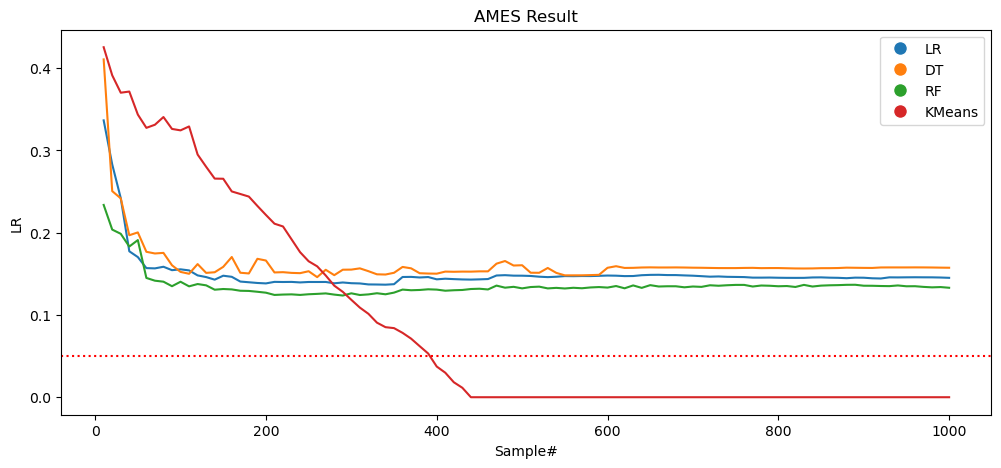

In [4]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=exp_result, x="Sample#", y="LR", color=palette[0])
sns.lineplot(data=exp_result, x="Sample#", y="DT", color=palette[1])
sns.lineplot(data=exp_result, x="Sample#", y="RF", color=palette[2])
sns.lineplot(data=exp_result, x="Sample#", y="adj_Kmeans", color=palette[3])
plt.legend(handles=[
    Line2D([0], [0], marker="o", color="w", label="LR", markerfacecolor=palette[0], markersize=10),
    Line2D([0], [0], marker="o", color="w", label="DT", markerfacecolor=palette[1], markersize=10),
    Line2D([0], [0], marker="o", color="w", label="RF", markerfacecolor=palette[2], markersize=10),
    Line2D([0], [0], marker="o", color="w", label="KMeans", markerfacecolor=palette[3], markersize=10)
])
plt.axhline(0.05, color="r", linestyle=":")
plt.title("AMES Result")
plt.show()

In [101]:
slr, sdt, srf = False, False, False
for idx in range(len(exp_result)):
    lr, dt, rf, k = exp_result.iloc[idx]["LR"], exp_result.iloc[idx]["DT"], exp_result.iloc[idx]["RF"], exp_result.iloc[idx]["Kmeans"]
    if k<lr and not slr:
        slr = True
        print(f"LR: {idx}")
    if k<dt and not sdt:
        sdt = True
        print(f"DT: {idx}")
    if k<srf and not srf:
        srf = True
        print(f"RF: {idx}")

DT: 26
LR: 27


In [2]:
260/438

0.593607305936073

In [50]:
exp_result

,Sample#,LR,DT,RF,Kmeans,adj_Kmeans,adj_corr
0,10,0.336597,0.410718,0.233781,0.655405,0.425524,0.570
0,20,0.283049,0.250562,0.203800,0.468606,0.391382,0.724
0,30,0.242013,0.241795,0.198684,0.421446,0.370224,0.764
0,40,0.177429,0.196937,0.183196,0.416955,0.371634,0.778
0,50,0.170383,0.200376,0.191035,0.353348,0.343651,0.879
...,...,...,...,...,...,...,...
0,960,0.145847,0.157852,0.134970,0.000000,0.000000,-1.000
0,970,0.145776,0.157809,0.134140,0.000000,0.000000,-1.000
0,980,0.145738,0.157718,0.133579,0.000000,0.000000,-1.000
0,990,0.145528,0.157552,0.133934,0.000000,0.000000,-1.000


In [107]:
exp_result.iloc[27:]

,Sample#,LR,DT,RF,Kmeans,adj_Kmeans,adj_corr
0,280,0.138510,0.148399,0.123002,0.135645,0.135645,-1.0
0,290,0.139504,0.155028,0.125362,0.128113,0.128113,-1.0
0,300,0.138630,0.155158,0.124668,0.118417,0.118417,-1.0
0,310,0.138341,0.156671,0.124593,0.108943,0.108943,-1.0
0,320,0.137136,0.153243,0.124890,0.101423,0.101423,-1.0
...,...,...,...,...,...,...,...
0,960,0.145847,0.157852,0.134915,0.000000,0.000000,-1.0
0,970,0.145776,0.157809,0.133716,0.000000,0.000000,-1.0
0,980,0.145738,0.157718,0.135776,0.000000,0.000000,-1.0
0,990,0.145528,0.157552,0.134513,0.000000,0.000000,-1.0


In [7]:
test = valid.iloc[0].copy()

In [16]:
from sklearn.tree import plot_tree

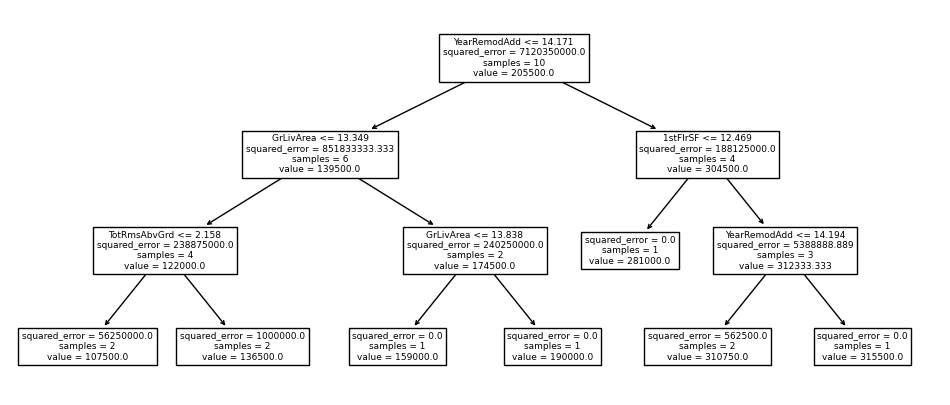

In [21]:
plt.figure(figsize=(12, 5))
plot_tree(models[0][0][1], feature_names=ftrs);

In [49]:
models[0][0][1].predict(valid[ftrs])

array([190000., 107500., 107500., 159000., 315500., 136500., 310750.,
       310750., 281000., 136500., 136500., 310750., 281000., 315500.,
       281000., 136500., 281000., 310750., 136500., 310750., 310750.,
       281000., 281000., 310750., 310750., 310750., 315500., 107500.,
       281000., 136500., 107500., 107500., 281000., 107500., 310750.,
       190000., 136500., 281000., 281000., 107500., 136500., 310750.,
       107500., 107500., 107500., 281000., 107500., 136500., 281000.,
       136500., 190000., 136500., 107500., 159000., 281000., 310750.,
       281000., 136500., 136500., 107500., 107500., 315500., 310750.,
       315500., 315500., 310750., 107500., 107500., 136500., 281000.,
       310750., 136500., 107500., 136500., 310750., 136500., 315500.,
       281000., 136500., 107500., 281000., 136500., 107500., 281000.,
       136500., 310750., 281000., 136500., 136500., 310750., 310750.,
       281000., 107500., 190000., 159000., 310750., 281000., 310750.,
       310750., 1900

In [44]:
models[0][0][-1].predict(valid[ftrs])

array([8, 3, 1, 6, 0, 4, 5, 9, 2, 7, 4, 2, 2, 6, 0, 3, 5, 0, 0, 5, 0, 1,
       4, 2, 5, 5, 1, 5, 1, 2, 5, 6, 2, 5, 7, 9, 2, 1, 8, 5, 5, 5, 0, 4,
       4, 3, 9, 5, 4, 9, 2, 2, 6, 8, 3, 5, 3, 7, 3, 6, 5, 0, 5, 3, 8, 5,
       1, 4, 8, 5, 8, 7, 1, 3, 8, 0, 7, 4, 5, 5, 1, 1, 1, 6, 1, 4, 5, 1,
       4, 2, 2, 8, 5, 1, 5, 9, 5, 3, 5, 1, 9, 8, 5, 5, 8, 3, 4, 8, 9, 2,
       0, 1, 2, 8, 1, 8, 3, 8, 2, 1, 6, 5, 0, 8, 1, 0, 3, 4, 2, 0, 4, 4,
       0, 5, 7, 4, 0, 5, 9, 9, 5, 6, 5, 7, 1, 9, 7, 3, 2, 4, 4, 5, 6, 7,
       4, 8, 0, 5, 6, 7, 5, 3, 9, 0, 4, 4, 5, 5, 2, 7, 5, 5, 4, 4, 2, 1,
       5, 3, 2, 0, 2, 3, 4, 1, 0, 5, 4, 8, 0, 7, 1, 7, 2, 3, 8, 4, 2, 5,
       5, 2, 1, 6, 1, 1, 8, 8, 9, 9, 1, 8, 5, 8, 5, 3, 5, 5, 4, 0, 1, 9,
       8, 4, 4, 8, 8, 1, 7, 8, 0, 4, 0, 5, 4, 7, 4, 5, 1, 0, 5, 4, 1, 1,
       5, 5, 0, 6, 1, 0, 5, 5, 3, 3, 1, 3, 6, 0, 2, 8, 3, 0, 0, 0, 5, 1,
       5, 2, 5, 8, 8, 5, 8, 3, 7, 1, 2, 7, 7, 1, 4, 0, 7, 8, 9, 8, 6, 2,
       8, 6, 8, 8, 4, 4, 5, 0, 7, 3, 1, 5, 5, 8, 5,

In [48]:
exp_pred[0]["Kmeans"]

,Pred_Y,Act_Y
0,190000,190000
1,100000,100000
2,115000,115000
3,159000,159000
4,315500,315500
...,...,...
433,115000,139000
434,115000,126175
435,137500,205950
436,115000,110000


In [32]:
lr, dt, rf, kmean = [], [], [], []
for idx in range(len(exp_pred)):
    lr.append(pd.DataFrame(exp_pred[idx]["LR"]).T)
    dt.append(pd.DataFrame(exp_pred[idx]["DT"]).T)
    rf.append(pd.DataFrame(exp_pred[idx]["RF"]).T)
    kmean.append(pd.DataFrame(exp_pred[idx]["Kmeans"]["Pred_Y"]).T)
lr = pd.concat(lr, axis=0).reset_index(drop=True).T
dt = pd.concat(dt, axis=0).reset_index(drop=True).T
rf = pd.concat(rf, axis=0).reset_index(drop=True).T
kmean = pd.concat(kmean, axis=0).reset_index(drop=True).T
#
lr.columns = [f"Valid {x}" for x in range(0, 100)]
dt.columns = [f"Valid {x}" for x in range(0, 100)]
rf.columns = [f"Valid {x}" for x in range(0, 100)]
kmean.columns = [f"Valid {x}" for x in range(0, 100)]
#
lr_min, lr_max = [], []
dt_min, dt_max = [], []
rf_min, rf_max = [], []
kmean_min, kmean_max = [], []
for c in range(100):
    lr_min.append(np.min((abs(valid[target] - lr.iloc[:, c]))/valid[target]))
    lr_max.append(np.max((abs(valid[target] - lr.iloc[:, c]))/valid[target]))
    dt_min.append(np.min((abs(valid[target] - dt.iloc[:, c]))/valid[target]))
    dt_max.append(np.max((abs(valid[target] - dt.iloc[:, c]))/valid[target]))
    rf_min.append(np.min((abs(valid[target] - rf.iloc[:, c]))/valid[target]))
    rf_max.append(np.max((abs(valid[target] - rf.iloc[:, c]))/valid[target]))
    kmean_min.append(np.min((abs(valid[target] - kmean.iloc[:, c]))/valid[target]))
    kmean_max.append(np.max((abs(valid[target] - kmean.iloc[:, c]))/valid[target]))

In [33]:
# fig, ax = plt.subplots(figsize=(12, 5))
# sns.lineplot(lr_min, color=palette[0])
# sns.lineplot(dt_min, color=palette[1])
# sns.lineplot(rf_min, color=palette[2])
# sns.lineplot(kmean_min, color=palette[3])
# plt.legend(handles=[
#     Line2D([0], [0], marker="o", color="w", label="LR", markerfacecolor=palette[0], markersize=10),
#     Line2D([0], [0], marker="o", color="w", label="DT", markerfacecolor=palette[1], markersize=10),
#     Line2D([0], [0], marker="o", color="w", label="RF", markerfacecolor=palette[2], markersize=10),
#     Line2D([0], [0], marker="o", color="w", label="KMeans", markerfacecolor=palette[3], markersize=10)
# ])
# plt.title("AMES MIN MAPE")
# plt.ylabel("MIN MAPE")
# plt.show()

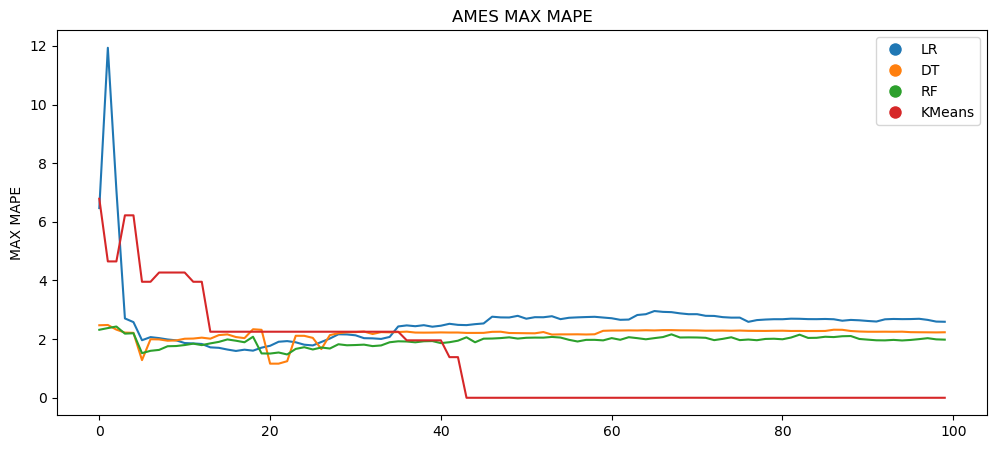

In [34]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(lr_max, color=palette[0])
sns.lineplot(dt_max, color=palette[1])
sns.lineplot(rf_max, color=palette[2])
sns.lineplot(kmean_max, color=palette[3])
plt.legend(handles=[
    Line2D([0], [0], marker="o", color="w", label="LR", markerfacecolor=palette[0], markersize=10),
    Line2D([0], [0], marker="o", color="w", label="DT", markerfacecolor=palette[1], markersize=10),
    Line2D([0], [0], marker="o", color="w", label="RF", markerfacecolor=palette[2], markersize=10),
    Line2D([0], [0], marker="o", color="w", label="KMeans", markerfacecolor=palette[3], markersize=10)
])
plt.title("AMES MAX MAPE")
plt.ylabel("MAX MAPE")
plt.show()

In [65]:
lr_e, dt_e, rf_e = [], [], []
for c in range(100):
    lr_e.append(lr.iloc[:, c]*0.4 + kmean.iloc[:, c]*0.6)
    dt_e.append(dt.iloc[:, c]*0.4 + kmean.iloc[:, c]*0.6)
    rf_e.append(rf.iloc[:, c]*0.4 + kmean.iloc[:, c]*0.6)
lr_e = pd.concat(lr_e, axis=1)
dt_e = pd.concat(dt_e, axis=1)
rf_e = pd.concat(rf_e, axis=1)

In [67]:
lr_min_e, lr_max_e = [], []
dt_min_e, dt_max_e = [], []
rf_min_e, rf_max_e = [], []
for c in range(100):
    lr_min_e.append(np.min((abs(valid[target] - lr_e.iloc[:, c]))/valid[target]))
    lr_max_e.append(np.max((abs(valid[target] - lr_e.iloc[:, c]))/valid[target]))
    dt_min_e.append(np.min((abs(valid[target] - dt_e.iloc[:, c]))/valid[target]))
    dt_max_e.append(np.max((abs(valid[target] - dt_e.iloc[:, c]))/valid[target]))
    rf_min_e.append(np.min((abs(valid[target] - rf_e.iloc[:, c]))/valid[target]))
    rf_max_e.append(np.max((abs(valid[target] - rf_e.iloc[:, c]))/valid[target]))

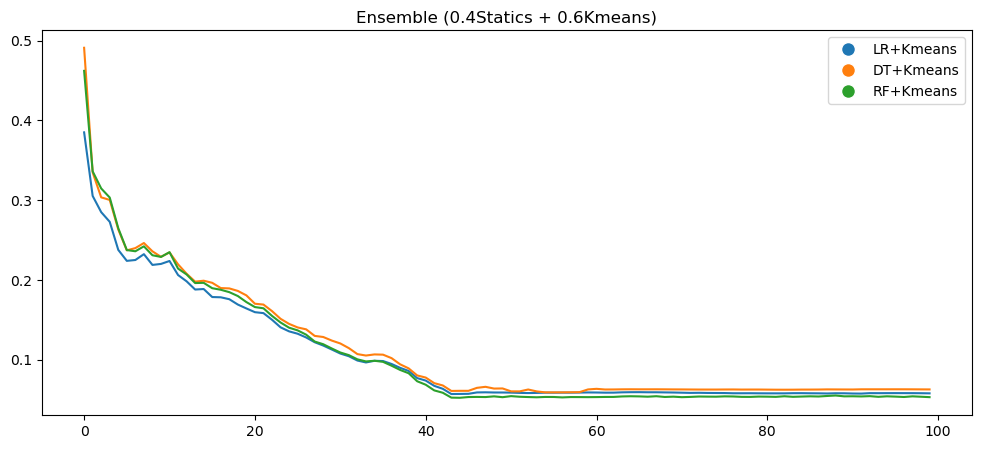

In [93]:
lre, dte, rfe = [], [], []
for c in range(100):
    lre.append(np.mean(abs(valid[target] - lr_e.iloc[:, c])/valid[target]))
    dte.append(np.mean(abs(valid[target] - dt_e.iloc[:, c])/valid[target]))
    rfe.append(np.mean(abs(valid[target] - rf_e.iloc[:, c])/valid[target]))
#
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(lre, color=palette[0])
sns.lineplot(dte, color=palette[1])
sns.lineplot(rfe, color=palette[2])
plt.legend(handles=[
    Line2D([0], [0], marker="o", color="w", label="LR+Kmeans", markerfacecolor=palette[0], markersize=10),
    Line2D([0], [0], marker="o", color="w", label="DT+Kmeans", markerfacecolor=palette[1], markersize=10),
    Line2D([0], [0], marker="o", color="w", label="RF+Kmeans", markerfacecolor=palette[2], markersize=10),
])
plt.title("Ensemble (0.4Statics + 0.6Kmeans)")
plt.show()

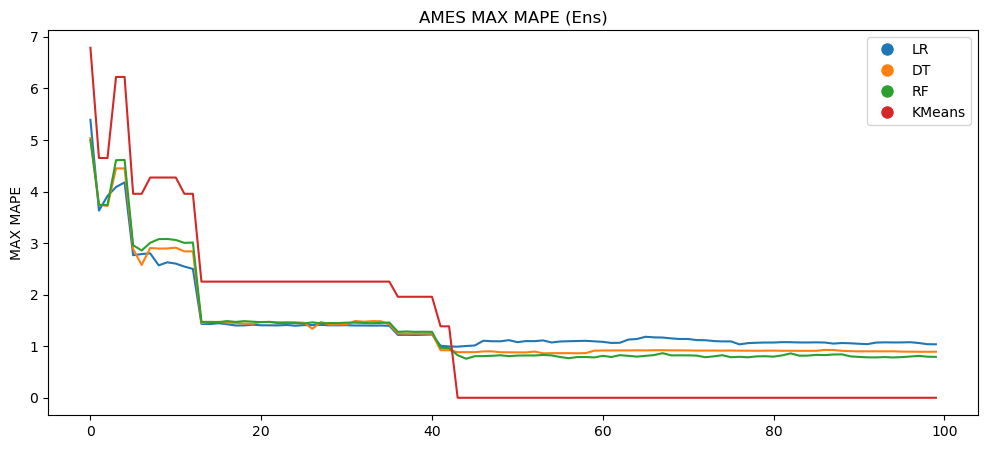

In [68]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(lr_max_e, color=palette[0])
sns.lineplot(dt_max_e, color=palette[1])
sns.lineplot(rf_max_e, color=palette[2])
sns.lineplot(kmean_max, color=palette[3])
plt.legend(handles=[
    Line2D([0], [0], marker="o", color="w", label="LR", markerfacecolor=palette[0], markersize=10),
    Line2D([0], [0], marker="o", color="w", label="DT", markerfacecolor=palette[1], markersize=10),
    Line2D([0], [0], marker="o", color="w", label="RF", markerfacecolor=palette[2], markersize=10),
    Line2D([0], [0], marker="o", color="w", label="KMeans", markerfacecolor=palette[3], markersize=10)
])
plt.title("AMES MAX MAPE (Ens)")
plt.ylabel("MAX MAPE")
plt.show()

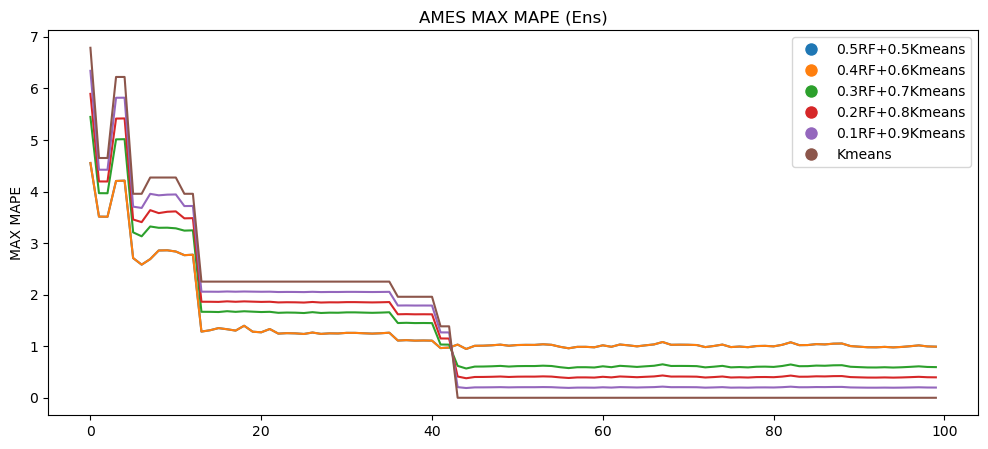

In [64]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(rf_k_5, color=palette[0])
sns.lineplot(rf_k_6, color=palette[1])
sns.lineplot(rf_k_7, color=palette[2])
sns.lineplot(rf_k_8, color=palette[3])
sns.lineplot(rf_k_9, color=palette[4])
sns.lineplot(kmean_max, color=palette[5])
plt.legend(handles=[
    Line2D([0], [0], marker="o", color="w", label="0.5RF+0.5Kmeans", markerfacecolor=palette[0], markersize=10),
    Line2D([0], [0], marker="o", color="w", label="0.4RF+0.6Kmeans", markerfacecolor=palette[1], markersize=10),
    Line2D([0], [0], marker="o", color="w", label="0.3RF+0.7Kmeans", markerfacecolor=palette[2], markersize=10),
    Line2D([0], [0], marker="o", color="w", label="0.2RF+0.8Kmeans", markerfacecolor=palette[3], markersize=10),
    Line2D([0], [0], marker="o", color="w", label="0.1RF+0.9Kmeans", markerfacecolor=palette[4], markersize=10),
    Line2D([0], [0], marker="o", color="w", label="Kmeans", markerfacecolor=palette[5], markersize=10)
])
plt.title("AMES MAX MAPE (Ens)")
plt.ylabel("MAX MAPE")
plt.show()